## **Pandas Sales Analysis Real_world Problem**
In this problem we use 12 different csv data files and apply preprocessing on it.


## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

## **Import Data on Colab**

In [2]:
uploaded = files.upload()
dfs=[]
for name in uploaded.keys():
  print(f'User uploaded {name} with length {len(uploaded[name])} bytes. ')
  df = pd.read_csv(io.BytesIO(uploaded[name]))
  dfs.append(df)

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv
User uploaded Sales_April_2019.csv with length 1595953 bytes. 
User uploaded Sales_August_2019.csv with length 1043593 bytes. 
User uploaded Sales_December_2019.csv with length 2181642 bytes. 
User uploaded Sales_February_2019.csv with length 1046495 bytes. 
User uploaded Sales_January_2019.csv with length 843098 bytes. 
User uploaded Sales_July_

## **Merge all data into a data frame**



In [3]:
combined_df = pd.concat(dfs, axis=0, join='outer', ignore_index= True)
display(combined_df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### **About Code `pd.concat()`**
###### **definition:**
`pd.concat()` is a function in the pandas library used to concatenate or join multiple pandas objects (like DataFrames or Series) along a particular axis (either rows or columns).
###### **Syntax:**
`pd.concat([objects], axis=0, join='outer', ignore_index=False)`
###### **Parameters:**
- `object`: This is a list or dictionary of pandas objects (DataFrames or Series) that you want to concatenate.
- `axis`:
 - `axis=0` for vertical stacking (default)
 - `axis=1` for horizontal stacking
- `join`:
 - `'outer'`perform a union of indexes/columns (default)
 - `'inner'`: Perform an intersection of indexes/columns
- `ignore_index`:
 - `True`: the index is reset to a default integer index (0, 1, 2,...)
 - `False`: the original indexes are kept




## **Clean Up Data**
In this section we have to do some:
1. Clean Null
2. Clean any data type that does not belong to the respective column (e.g., strings in the price column).
3. Change each column to its appropriate data type.

In [4]:
# Number of Nulls in Data Frame
null_per_column = pd.DataFrame({ 'Number of Null Values' : combined_df.isna().sum()})
display(null_per_column)

,Number of Null Values
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [5]:
# Show Part of DataFrame with Null Values
null_df = combined_df.loc[combined_df.isna().any(axis=1)]
display(null_df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


## **About Code `pd.any()`**
###### **Definition**:
The `.any()` method is a function in pandas (and also in NumPy) used to check whether at least one element in a DataFrame or Series is `True`. It evaluates the elements of the object along a specified axis and returns a Boolean result.
###### **Syntax**:
`DataFrame.any(axis)`
###### **Parameters**:
- `axis=0`: Check vertically
- `axis=1`: Check Horizontally


In [6]:
# Drop Null Values
combined_df.dropna(axis=0, how='all', inplace=True)
combined_df.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


## **About Code `dropna()`**
###### **Definition**:
The `.dropna()` method in pandas is used to remove missing or `NaN` values from a DataFrame or Series. It allows you to drop rows or columns that contain `NaN` values, giving you a cleaner dataset.
###### **Syntax**:
`DataFrame.dropna(axis, how, inplace)`
###### **Parameters**:
- `axis`:
 - `axis=0`: (default) Drop rows that contain `NaN` values.
 - `axis=1`: Drop columns that contain `NaN` values.
- `how`:
 - `'any'`: (default) Drop rows/columns if any `NaN` values are present
 - `'all'`:  Drop rows/columns only if all values are `NaN`
-`inplace`:
 - `True`:  operation is performed in place
 - `False`: (default), a new DataFrame is returned


In [7]:
# Find Strings in 'Order Date' column
df1 = combined_df.loc[combined_df['Order Date'].str[0:2] == 'Or', ['Order Date']]
display(df1)

,Order Date
519,Order Date
1149,Order Date
1155,Order Date
2878,Order Date
2893,Order Date
...,...
185164,Order Date
185551,Order Date
186563,Order Date
186632,Order Date


In [8]:
# Remove the String Values in the 'Order Date' column.
combined_df = combined_df.loc[combined_df['Order Date'].str[0:2] != 'Or']
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
# Check that 'Quantity Ordered' and 'Price Each' are in the correct data type.
combined_df['Quantity Ordered']= pd.to_numeric(combined_df['Quantity Ordered'])
combined_df['Price Each']= pd.to_numeric(combined_df['Price Each'])

## **About Code `.to_numeric()`**
###### **Definition**:
The `pd.to_numeric()` function in pandas is used to convert a Series or list-like object (e.g., a column of a DataFrame) into a numeric data type (integer or float). It is particularly useful when you have data that may contain non-numeric values (such as strings) and you want to coerce them into valid numbers (or handle errors gracefully).

## **Question 1**
## What was the best month for sales?



In [10]:
# Add 'Month' Column
combined_df['Month'] = combined_df['Order Date'].str[0:2].astype('int32')
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
# Add 'Sales' Column (Quantity * Price Each)
combined_df['Sales'] = combined_df['Quantity Ordered'] * combined_df['Price Each']
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
# Answer to question 1: What was the best month forr sales?
sales_per_month = combined_df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
display(sales_per_month)

,Sales
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


##**About Code `.groupby()`**
###### **Definition**:
The `.groupby()` method in pandas is used to group data based on some criteria (like column values) and then apply a function (like aggregation, transformation, or filtration) to each group. It is one of the most powerful and commonly used methods in pandas for data analysis.
###### **Syntax**:
`DataFrame.groupby(by, dropna=True)`
###### **Parameters**:
- `by`: You can pass a single column name, a list of column names
- `dropna=True`: Groups containing `NaN` values will be dropped



In [13]:
# Rank of each month in Sale
rank_spm =pd.DataFrame({'Rank of The Month' : sales_per_month.rank(ascending=False)})
display(rank_spm)

,Rank of The Month
Month,
12,1.0
10,2.0
4,3.0
11,4.0
5,5.0
3,6.0
7,7.0
6,8.0
8,9.0


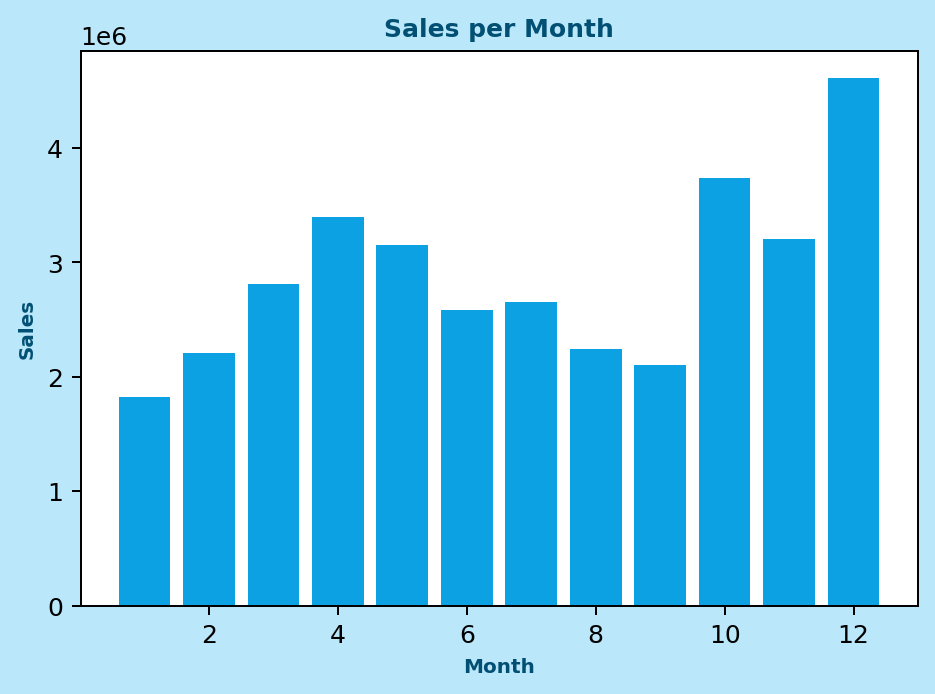

In [14]:
# Visualize

plt.figure(figsize=(6,4), dpi=180, facecolor='#bbe7fa')

label_font = {'size': 8,
              'color':'#015073',
              'weight':'bold'}
title_font = {'size':10,
              'color':'#015073',
              'weight':'bold'}

plt.xlabel('Month', fontdict=label_font)
plt.ylabel('Sales', fontdict=label_font)
plt.title('Sales per Month', fontdict=title_font)

bars = plt.bar(sales_per_month.index, sales_per_month.values, width=0.8, align='center', color='#0ba1e3')
plt.show()


## **Question2**:
## What city had the highest value of sales?

In [15]:
# Add City Column
def get_city(a):
  return a.split(',')[1]
def get_state(a):
  return a.split(',')[2].split(' ')[1]
combined_df['City(State)'] = combined_df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City(State)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [16]:
# Answer the question 2: What city had the highest value of sales?
sales_per_city = combined_df.groupby(['City(State)'])['Sales'].sum().sort_values(ascending=False)
sales_per_city

,Sales
City(State),
San Francisco (CA),8262203.91
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Boston (MA),3661642.01
Atlanta (GA),2795498.58
Dallas (TX),2767975.40
Seattle (WA),2747755.48
Portland (OR),1870732.34
Austin (TX),1819581.75


In [17]:
# Ranking
sales_per_city_ranking = sales_per_city.rank(ascending=False)
sales_per_city_ranking

,Sales
City(State),
San Francisco (CA),1.0
Los Angeles (CA),2.0
New York City (NY),3.0
Boston (MA),4.0
Atlanta (GA),5.0
Dallas (TX),6.0
Seattle (WA),7.0
Portland (OR),8.0
Austin (TX),9.0


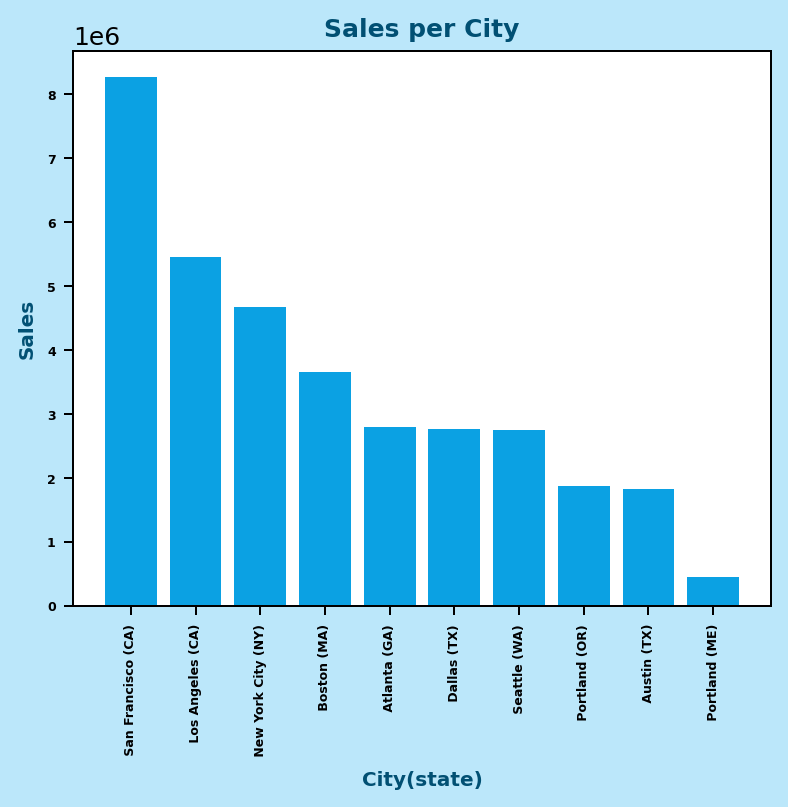

In [18]:
# Visualize
plt.figure(figsize=(5,4), dpi=180, facecolor='#bbe7fa')

label_font = {'size': 8,
              'color':'#015073',
              'weight':'bold'}
title_font = {'size':10,
              'color':'#015073',
              'weight':'bold'}

plt.xlabel('City(state)', fontdict=label_font,)
plt.ylabel('Sales', fontdict=label_font)
plt.title('Sales per City', fontdict=title_font)
plt.xticks(size=5, rotation=90, weight='bold')
plt.yticks(size=5, weight='bold')

bars = plt.bar(sales_per_city.index, sales_per_city.values, width=0.8, align='center', color='#0ba1e3')
plt.show()

## **Question3**:
## What time should we display advertisements to maximum likehood of customer's buying product?

In [19]:
# Convert the 'Order Date' to the datetime
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])
combined_df.head()

<ipython-input-19-31293242e644>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City(State)
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
# Add Hour column
combined_df['Hour'] = combined_df['Order Date'].dt.hour
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City(State),Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [21]:
# Answer to question:
sales_per_hour = combined_df.groupby(['Hour'])['Sales'].sum().sort_values(ascending=False)
sales_per_hour

,Sales
Hour,
19,2412938.54
12,2316821.34
11,2300610.24
20,2281716.24
18,2219348.30
13,2155389.80
17,2129361.61
14,2083672.73
21,2042000.86


In [22]:
# Ranking
sales_per_hour_ranking = sales_per_hour.rank(ascending=False)
sales_per_hour_ranking

,Sales
Hour,
19,1.0
12,2.0
11,3.0
20,4.0
18,5.0
13,6.0
17,7.0
14,8.0
21,9.0


In [23]:
# Sales count
sales_count = combined_df.groupby(['Hour'])['Sales'].count()
sales_count

,Sales
Hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


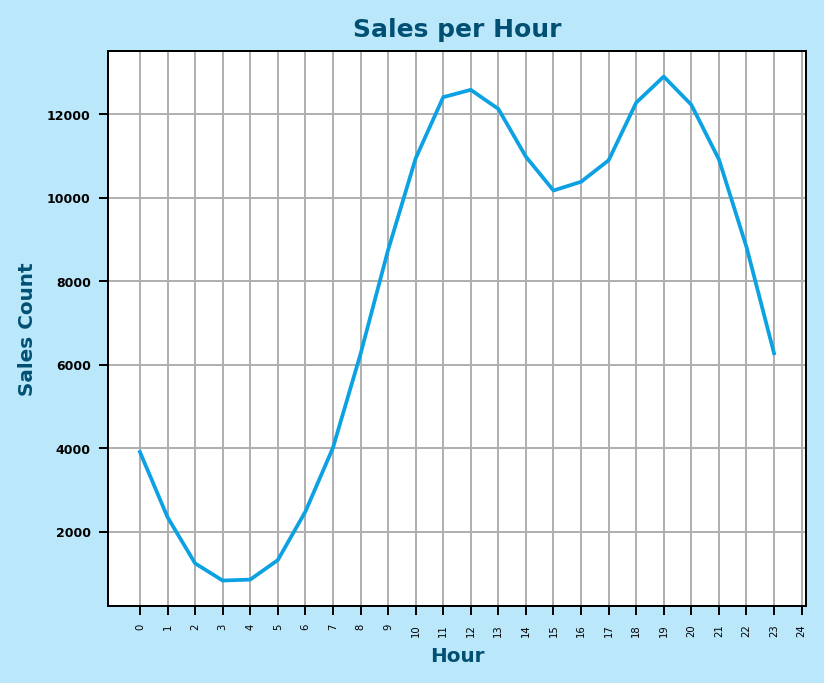

In [24]:
# visualize
plt.figure(figsize=(5,4), dpi=180, facecolor='#bbe7fa')

label_font = {'size': 8,
              'color':'#015073',
              'weight':'bold'}
title_font = {'size':10,
              'color':'#015073',
              'weight':'bold'}

plt.xlabel('Hour', fontdict=label_font,)
plt.ylabel('Sales Count', fontdict=label_font)
plt.title('Sales per Hour', fontdict=title_font)
plt.xticks(np.arange(0,25), size = 4, rotation=90)
plt.yticks(size=5, weight='bold')

plt.plot(sales_count.index, sales_count.values, color='#0ba1e3')
plt.grid()
plt.show()

## **Question 4**:
## What products are most often sold together?


In [25]:
# Check Duplicated IDs
df = combined_df.loc[combined_df['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City(State),Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13


## **About Code**: `pd.duplicated()`
###### **Definition**
In pandas, the `.duplicated()` method is used to identify duplicate rows in a DataFrame. It returns a boolean Series indicating whether each row is a duplicate of a previous row (based on specified columns). The default behavior checks for duplicates across all columns.
###### **Syntax**:
`DataFrame.duplicated(subset=None, keep='first')`
###### **Parameters**:
- `subset`: (optional) A list of column names to check for duplicates. If not provided, it checks across all columns.
- `keep`: (optional) Determines which duplicates to mark as `True`:
 - `'first'` (default): Marks all but the first occurrence of a duplicate as `True`.
 - `'last'`: Marks all but the last occurrence as `True`.
 - `False`: Marks all occurrences of duplicates as `True`.



In [32]:
# Which products were frequently purchased together in the same order
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
display(df[['Order ID','Grouped']])

# It
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

<ipython-input-32-edae57b0c1c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...
186792,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,"Google Phone,USB-C Charging Cable"


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


## **About Code**: `.transform()`
###### **Definition**:
In pandas, the `.transform()` method is used to apply a function (or a set of functions) to each group of data in a GroupBy operation or across a DataFrame or Series. It allows you to perform transformations that return a result with the same shape as the input.
###### **Syntax**:
`DataFrame.transform(func, axis=0)`
###### **Parameters**:
- `func`: The function to apply. It can be a callable (like a lambda function, or a named function) or a list of functions.
- `axis`: 0 (default) for applying the function to each column, and 1 for applying it to each row.



In [47]:
# Finding Products Frequently Sold Together in The Same Order
from itertools import combinations  # itertools: Provides functions for creating
from collections import Counter  # collections: Provides specialized container

# Initializing a Counter
count = Counter() # This will be used to store and count the occurrences of product pairs.

# Iterating through grouped products
for raw in df2['Grouped']:
  raw_list = raw.split(',')
  count.update(Counter(combinations(raw_list, 2)))
  # combinations(raw_list, 2) --> This generates all possible pairs of products from the `raw_list` (combinations of 2).
  # Counter(...) -->  A Counter object is created to count these product pairs.
  # count.update(...) --> The main `count` Counter is updated with the counts of product pairs from the current order.

# Printing the most common pairs
keys=[]
values=[]
for key,value in count.most_common(10): # This retrieves the 10 most frequent product pairs and their counts from the `count` Counter.
    print(key, value)
    keys.append(str(key))
    values.append(value)
print(keys), print(values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
["('iPhone', 'Lightning Charging Cable')", "('Google Phone', 'USB-C Charging Cable')", "('iPhone', 'Wired Headphones')", "('Google Phone', 'Wired Headphones')", "('Vareebadd Phone', 'USB-C Charging Cable')", "('iPhone', 'Apple Airpods Headphones')", "('Google Phone', 'Bose SoundSport Headphones')", "('USB-C Charging Cable', 'Wired Headphones')", "('Vareebadd Phone', 'Wired Headphones')", "('Lightning Charging Cable', 'Wired Headphones')"]
[1005, 987, 447, 414, 361, 360, 220, 160, 143, 92]


(None, None)

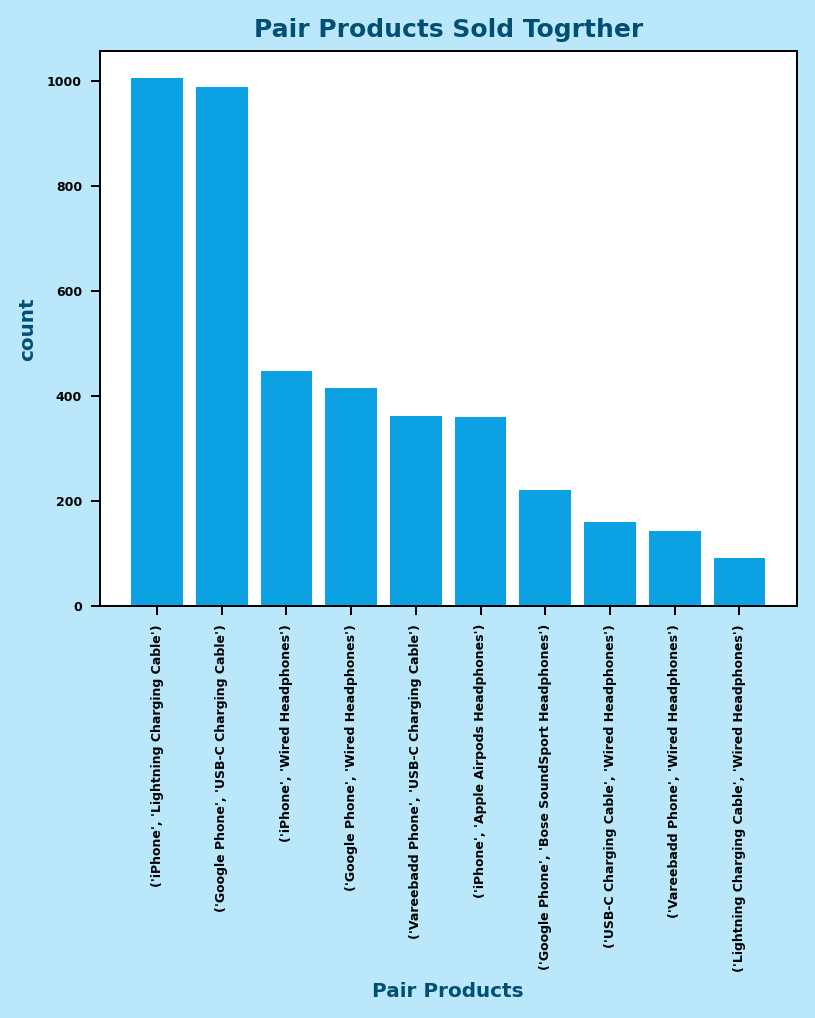

In [51]:
# Visualize
plt.figure(figsize=(5,4), dpi=180, facecolor='#bbe7fa')

label_font = {'size': 8,
              'color':'#015073',
              'weight':'bold'}
title_font = {'size':10,
              'color':'#015073',
              'weight':'bold'}

plt.xlabel('Pair Products', fontdict=label_font,)
plt.ylabel('count', fontdict=label_font)
plt.title('Pair Products Sold Togrther', fontdict=title_font)
plt.xticks(size=5, rotation=90, weight='bold')
plt.yticks(size=5, weight='bold')

bars = plt.bar(keys, values, width=0.8, align='center', color='#0ba1e3')
plt.show()

## **About Code**
## **`Counter()`**
###### **Definition**:
The `Counter` class in Python provides a convenient way to count the frequency of elements in an iterable(like a list, string, or even a pandas Series). It creates a dictionary-like object where keys are the elements, and values are their counts.
## **`.combinations()`**
###### **Definition**:
It is used to generate all possible combinations of a specified length from a given iterable (e.g., list, tuple, string). The order of the elements does not matter in combinations, and each combination is generated only once (i.e., no duplicates).
###### **Syntax**:
`combinations(iterable, r)`
###### **Parameters**:
- `iterable`: The input sequence (like a list, tuple, or string).
- `r`: The length of each combination.

## **`.update()`**
###### **Definition**:
The `.update()` method in dictionaries is used to update the dictionary with key-value pairs from another dictionary or from an iterable of key-value pairs. If a key already exists, its value will be updated; if a key does not exist, it will be added.

## **`.most_common()`**:
The `.most_common()` method is part of the Counter class in Python's collections module. It is used to return the most common elements from the collection, along with their counts.


## **Question5**
## What product sold the most?


In [50]:
products_sold_count = combined_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
products_sold_count

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


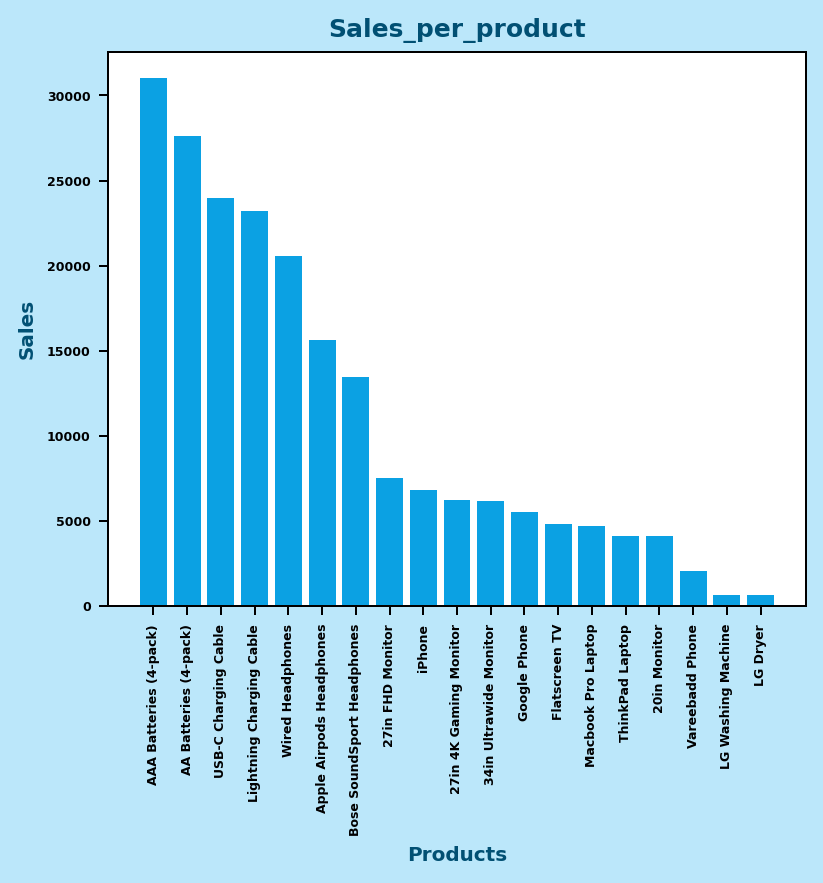

In [52]:
# Visualize
plt.figure(figsize=(5,4), dpi=180, facecolor='#bbe7fa')

label_font = {'size': 8,
              'color':'#015073',
              'weight':'bold'}
title_font = {'size':10,
              'color':'#015073',
              'weight':'bold'}

plt.xlabel('Products', fontdict=label_font,)
plt.ylabel('Sales', fontdict=label_font)
plt.title('Sales_per_product', fontdict=title_font)
plt.xticks(size=5, rotation=90, weight='bold')
plt.yticks(size=5, weight='bold')

bars = plt.bar(products_sold_count.index, products_sold_count.values, width=0.8, align='center', color='#0ba1e3')
plt.show()